# <span style="color:blue">Thabo Mohale
</span>

# <span style="color:red">student number: 1744040
</span>

# <span style="color:blue">Lab assessment 3: Logistic Regression
</span>

<h1 style="color: blue; font-family: 'Times New Roman';">Libraries</h1>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

<h1 style="color: blue; font-family: 'Times New Roman';">Importing dataset</h1>

In [2]:
#import dataset
ha_df = pd.read_excel('Heart Attack Data Set spreadsheet.xlsx', header=None)

#split columns
ha_df = ha_df.iloc[:, 0].str.split(',', expand=True)

#set first row as the header
ha_df.columns = ha_df.iloc[0] 

#remove the first row from the DataFrame
ha_df = ha_df[1:] 

<h1 style="color: blue; font-family: 'Times New Roman';">Shape of dataset</h1>

In [3]:
#Number of rows & columns
ha_df.shape

(303, 14)

In [4]:
#columns data types
ha_df.dtypes

0
age         object
sex         object
cp          object
trestbps    object
chol        object
fbs         object
restecg     object
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
target      object
dtype: object

<h1 style="color: blue; font-family: 'Times New Roman';">Data cleaning</h1>

In [5]:
#convert all columns to numeric
ha_df = ha_df.apply(pd.to_numeric, errors='coerce')

In [6]:
#head dataset
ha_df.head()

0  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
1   63    1   3       145   233    1        0      150      0      2.3      0   
2   37    1   2       130   250    0        1      187      0      3.5      0   
3   41    0   1       130   204    0        0      172      0      1.4      2   
4   56    1   1       120   236    0        1      178      0      0.8      2   
5   57    0   0       120   354    0        1      163      1      0.6      2   

0  ca  thal  target  
1   0     1       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
5   0     2       1

In [7]:
#check for missing data
null_values = ha_df.isnull().sum()
print(null_values)

0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [8]:
#identify duplicate rows
duplicates = ha_df[ha_df.duplicated(keep=False)]

#show number of duplicate rows
print(len(duplicates))

2


In [9]:
#remove duplicate rows
ha_df = ha_df.drop_duplicates()
ha_df.shape

(302, 14)

<h1 style="color: blue; font-family: 'Times New Roman';">Descriptive statistics</h1>

In [10]:
#calculate mean, median, p25, p75, min & max for numerical columns
summary_stats= ha_df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].agg(['mean','median',
                lambda x: x.quantile(0.25),lambda x: x.quantile(0.75),'min','max'])

#rename rows for clarity
summary_stats.index = ['Mean', 'Median', 'P25', 'P75', 'MIN', 'MAX']

#print summary statistics, rounded to 1 decimal place
print(summary_stats.round(1))

0        age  trestbps   chol  thalach  oldpeak
Mean    54.4     131.6  246.5    149.6      1.0
Median  55.5     130.0  240.5    152.5      0.8
P25     48.0     120.0  211.0    133.2      0.0
P75     61.0     140.0  274.8    166.0      1.6
MIN     29.0      94.0  126.0     71.0      0.0
MAX     77.0     200.0  564.0    202.0      6.2


In [11]:
#check for unique categories in multiple columns
for column in ['target', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca']:
    unique_categories = ha_df[column].unique()
    print(f"'{column}")
    print(unique_categories)

'target
[1 0]
'sex
[1 0]
'cp
[3 2 1 0]
'fbs
[1 0]
'restecg
[0 1 2]
'exang
[0 1]
'slope
[0 2 1]
'ca
[0 2 1 3 4]


In [12]:
# count occurrences of each category in each column
for column in ['target', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca']:
    category_count = ha_df[column].value_counts()
    print(category_count)

target
1    164
0    138
Name: count, dtype: int64
sex
1    206
0     96
Name: count, dtype: int64
cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64
fbs
0    257
1     45
Name: count, dtype: int64
restecg
1    151
0    147
2      4
Name: count, dtype: int64
exang
0    203
1     99
Name: count, dtype: int64
slope
2    141
1    140
0     21
Name: count, dtype: int64
ca
0    175
1     65
2     38
3     20
4      4
Name: count, dtype: int64


<h1 style="color: blue; font-family: 'Times New Roman';">Correlation among variables</h1>

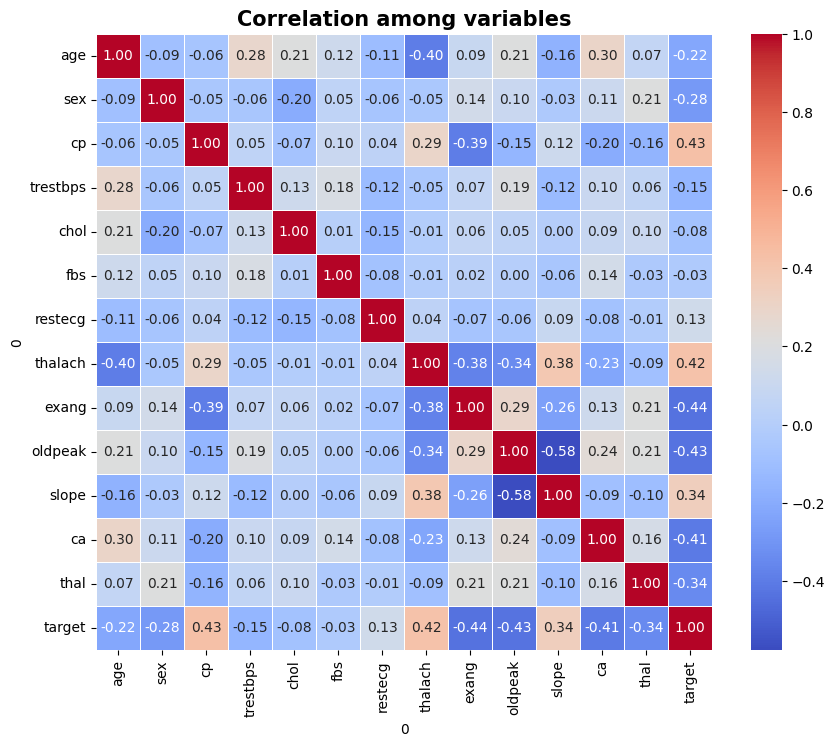

In [13]:
# calculate the correlation matrix
correlation_matrix = ha_df.corr()
# plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',square=True, 
            cbar=True, linewidths=0.5)  
plt.title('Correlation among variables', fontweight='bold', fontsize=15)
plt.show()

<h1 style="color: blue; font-family: 'Times New Roman';">Distribution of age</h1>

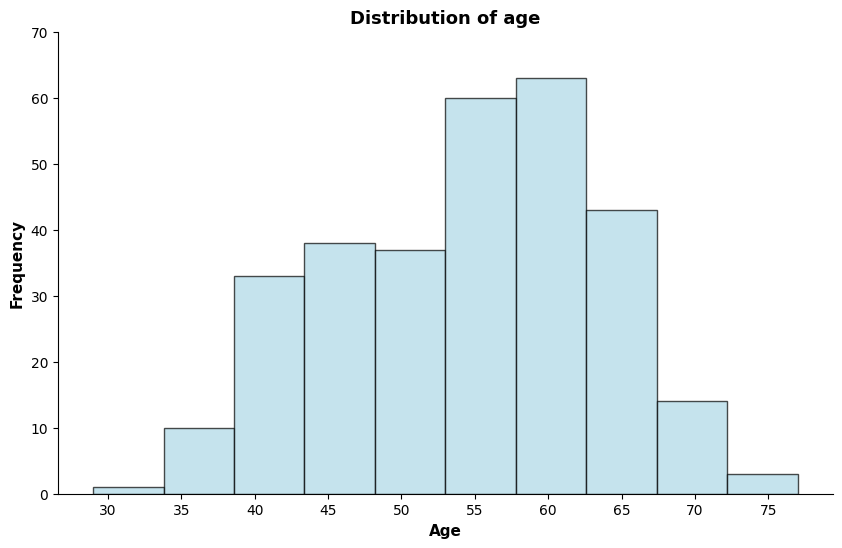

In [14]:
# Distribution of Age
plt.figure(figsize=(10, 6))
plt.hist(ha_df['age'], bins=10, color='lightblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of age',fontweight='bold', fontsize=13)
plt.xlabel('Age',fontweight='bold',fontsize=11)
plt.ylabel('Frequency',fontweight='bold',fontsize=11)
plt.grid(axis='y', alpha=0.75)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(range(30, 80, 5))  
plt.yticks(range(0, 80,10))
plt.grid(False)
plt.show()

<h1 style="color: blue; font-family: 'Times New Roman';">Distribution of cholesterol levels</h1>

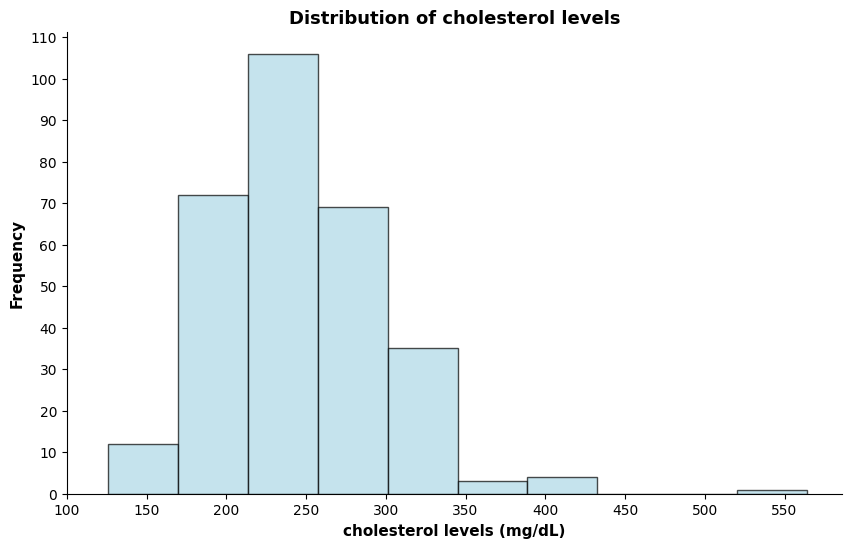

In [15]:
# Distribution of cholestrol levels
plt.figure(figsize=(10, 6))
plt.hist(ha_df['chol'], bins=10, color='lightblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of cholesterol levels',fontweight='bold', fontsize=13)
plt.xlabel('cholesterol levels (mg/dL)',fontweight='bold',fontsize=11)
plt.ylabel('Frequency',fontweight='bold',fontsize=11)
plt.grid(axis='y', alpha=0.75)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(range(100, 600, 50))  
plt.yticks(range(0, 120,10))
plt.grid(False)
plt.show()

<h1 style="color: blue; font-family: 'Times New Roman';">Distribution of those with heart disease by gender</h1>

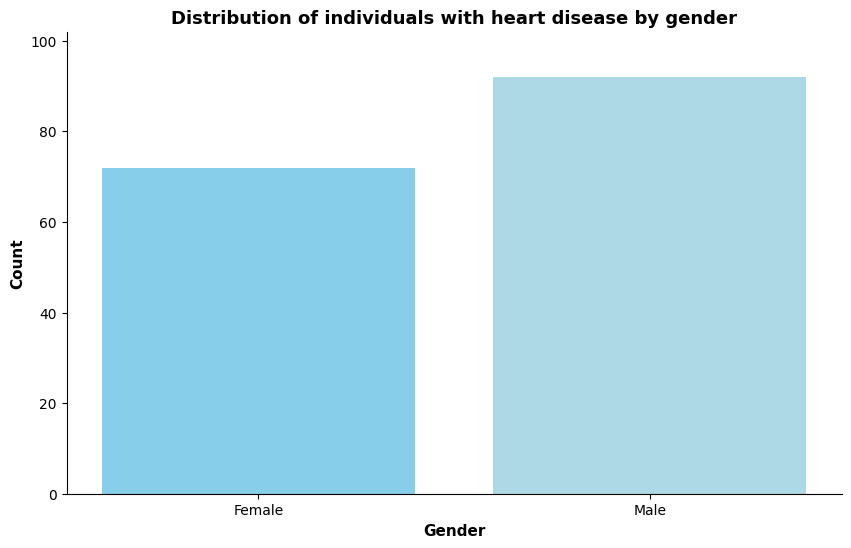

In [16]:
#filter for individuals with heart disease
heart_disease_pos_df = ha_df[ha_df['target'] == 1]

#count the number of males (1) and females (0)
gender_count = heart_disease_pos_df['sex'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
bars = plt.bar(gender_count.index, gender_count.values, color=['lightblue', 'skyblue'])

# Set titles and labels
plt.title('Distribution of individuals with heart disease by gender', fontweight='bold', fontsize=13)
plt.xlabel('Gender', fontweight='bold', fontsize=11)
plt.ylabel('Count', fontweight='bold', fontsize=11)
plt.xticks(ticks=[1, 0], labels=['Male', 'Female'], rotation=0)
plt.ylim(0, gender_count.max() + 10) 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(False)
plt.show()

<h1 style="color: blue; font-family: 'Times New Roman';">Distribution of those with heart disease by resting electrocardiogram results</h1>

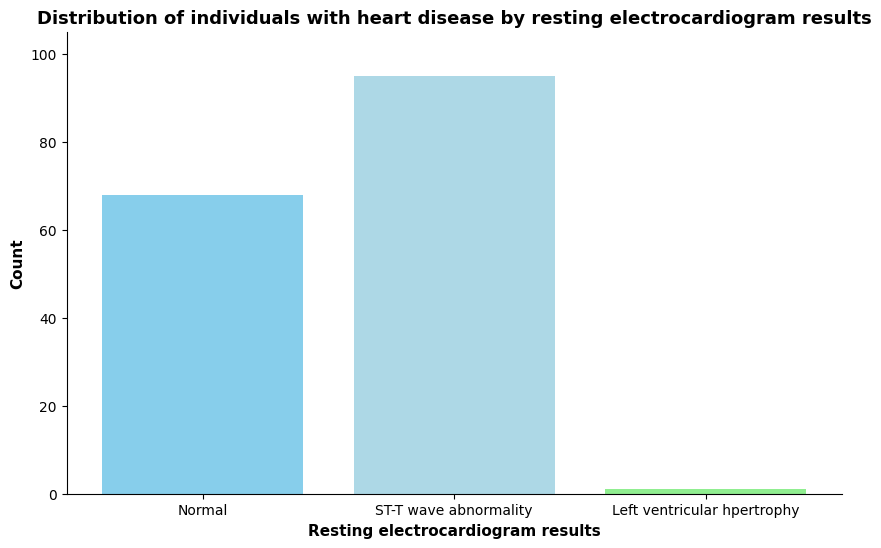

In [17]:
# Filter for individuals with heart disease
heart_disease_pos_df = ha_df[ha_df['target'] == 1]

# Count the number of resting electrocardiogram results
restecg_count = heart_disease_pos_df['restecg'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
bars = plt.bar(restecg_count.index, restecg_count.values, color=['lightblue', 'skyblue', 'lightgreen'])

# Set titles and labels
plt.title('Distribution of individuals with heart disease by resting electrocardiogram results', fontweight='bold', fontsize=13)
plt.xlabel('Resting electrocardiogram results', fontweight='bold', fontsize=11)
plt.ylabel('Count', fontweight='bold', fontsize=11)

# Customize x-ticks to represent the categories
plt.xticks(ticks=restecg_count.index, labels=['ST-T wave abnormality','Normal','Left ventricular hpertrophy'], rotation=0)

# Adjust y-axis range
plt.ylim(0, restecg_count.max() + 10) 

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(False)
# Show the plot
plt.show()

<h1 style="color: blue; font-family: 'Times New Roman';">Predicting heart disease</h1>

In [18]:
#assign X features 
X = ha_df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
#assign target variable
y = ha_df['target']

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#create a logistic regression model
log_reg_model = LogisticRegression(max_iter=1000)

#fit the model
log_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg_model.predict(X_test)

#evaluate model

#compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy = ", round(accuracy,2))

#compute precision
precision = precision_score(y_test, y_pred, average="macro")
print("Precision = ",precision.round(2))

#compute sensitivity
sensitivity = recall_score(y_test, y_pred,average="macro")
print("Sensitivity = ",sensitivity.round(2))


Accuracy =  0.82
Precision =  0.82
Sensitivity =  0.82
